**1.6 Decision tree**

Building a decision tree envolves a process called recursive partitioning, meaning that the dataset is successively split into subsets based on the values of input features. The goal is to create a tree structure that can efficiently make predictions for new, unseen data.

First, the entire dataset is considered as the starting point, representing the root node of the decision tree.
Then, different features are evaluated in order to find the one that provides the best split. The "best split" is determined based on a criterion such as Gini impurity, entropy, or information gain.
The criterion basically measures the homogeneity of the target classes in each subset. A split that results in more homogenous subsets is therefore preferred.

Once the best feature is identified, the dataset is split into subsets based on the unique values of that feature. Each subset corresponds to a branch emanating from the root node. 
This process is repeated for each branch, creating child nodes.

The process is applied recursively to each subset or node. For each subset, the algorithm selects the best feature to split on and creates new branches.
The recursion goes on until a stopping criterion is met. Common stopping criteria include reaching a maximum depth, having a minimum number of samples at a node, or achieving a certain level of purity.

Once the recursion stops, the final nodes are called leaf nodes. Each leaf node represents a unique combination of feature values and is associated with a predicted class.
The predicted class in a leaf node is often determined by the majority class of the samples in that node.

Each path from the root node to a leaf node corresponds to a decision rule. The rules are based on the feature values encountered along the path.

Decision trees can be prone to overfitting, capturing noise in the training data. Pruning involves removing branches or nodes that do not provide significant predictive power.
Pruning helps improve the generalization ability of the model to new, unseen data, but it is optional.

The resulting structure is a tree with nodes representing decision points and leaf nodes representing final predictions.

In [16]:
%%capture
%run preprocessing.ipynb

In [21]:
# Import necessary libraries
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Load data
X_train = np.load('X_train.npy')
X_test = np.load('X_test.npy')
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')

# Create a Decision Tree model with a specified random state for reproducibility
model = DecisionTreeClassifier(random_state=42, criterion='gini', max_depth=10, min_samples_leaf=10, min_samples_split=10)

# Train the Decision Tree model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the recall score for the Decision Tree model
recall = metrics.recall_score(y_test, y_pred, average='weighted')
precision = metrics.precision_score(y_test, y_pred, average='weighted')  
f1 = metrics.f1_score(y_test, y_pred, average='weighted') 

# Print metrics
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('F1: {:.2f}'.format(f1))

# Generate a classification report
report = metrics.classification_report(y_test, y_pred)
print('Classification report:')
print(report)


Precision: 0.98
Recall: 0.98
F1: 0.98
Classification report:
              precision    recall  f1-score   support

           1       0.96      0.98      0.97     10064
           2       1.00      1.00      1.00     10179
           3       0.98      0.97      0.97     10175

    accuracy                           0.98     30418
   macro avg       0.98      0.98      0.98     30418
weighted avg       0.98      0.98      0.98     30418



<Axes: >

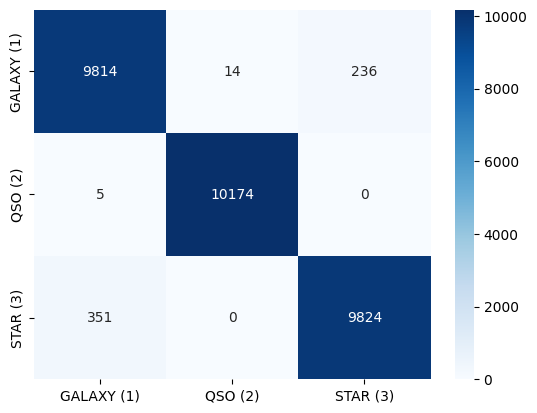

In [18]:
# Decision matrix

# Visualize the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create a confusion matrix
matrix = confusion_matrix(y_test, y_pred)

# Create a list of labels
labels = ['GALAXY (1)', 'QSO (2)', 'STAR (3)']

# Create a heatmap with the labels
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

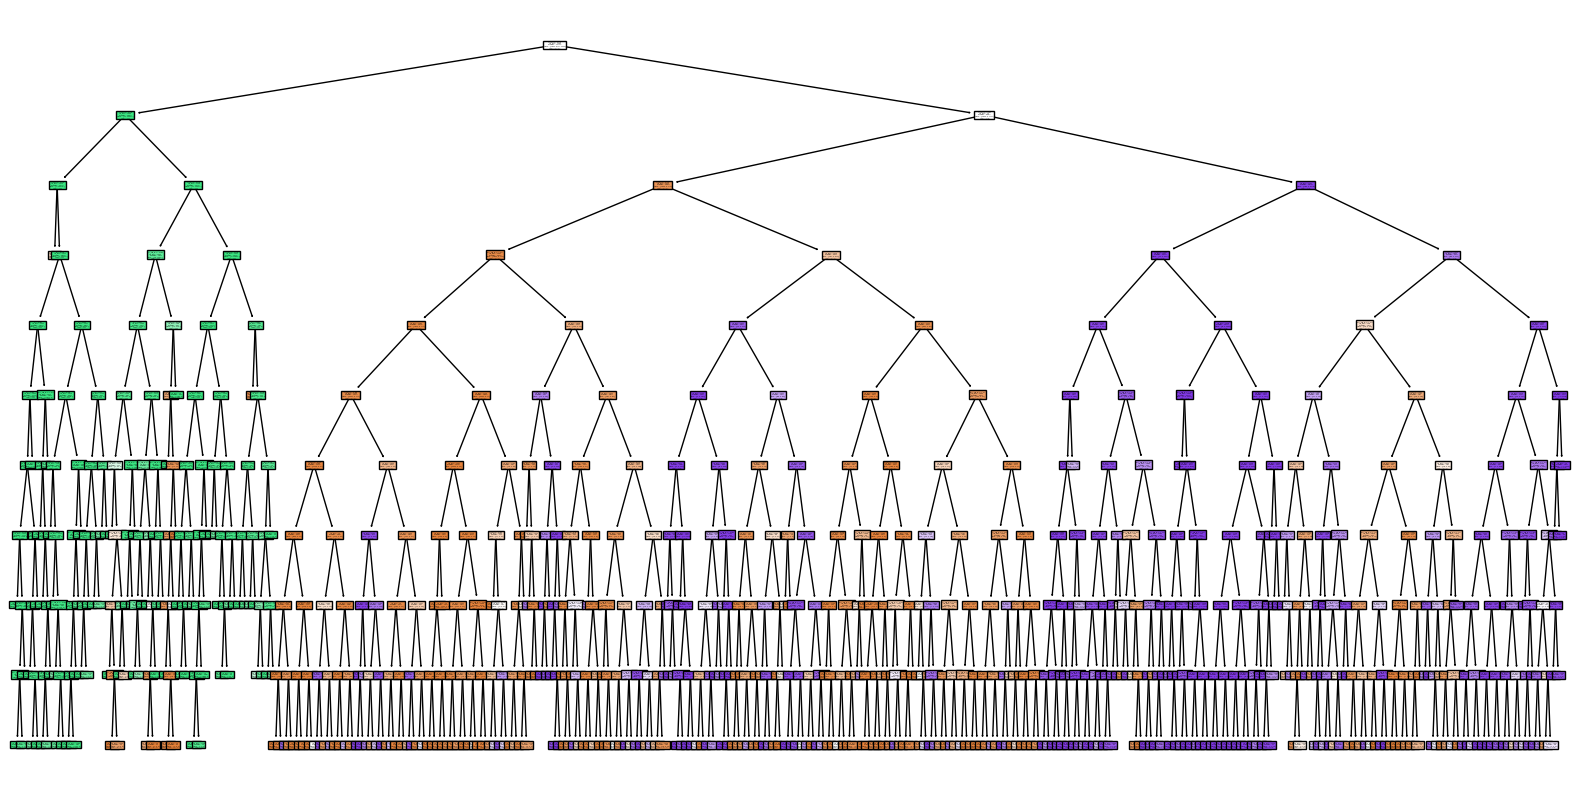

In [19]:
# Visualize the decision tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# List of features
feature_names = ['u', 'g', 'r', 'i', 'z', 'spec_obj_ID', 'redshift']

# List of classes
class_names = ['GALAXY', 'QSO', 'STAR']

plt.figure(figsize=(20,10))  # Set the figure size
plot_tree(model, filled=True, feature_names=feature_names, class_names=class_names)
plt.show()

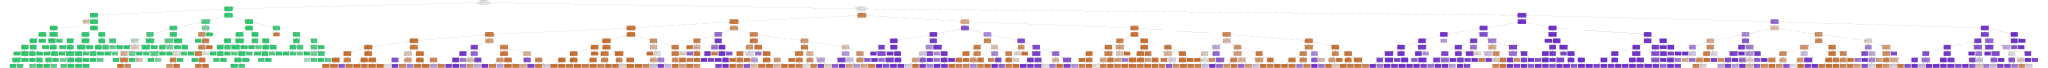

In [20]:
# Using Graphviz to visualize the decision tree

from sklearn import tree
import graphviz 

dot_data = tree.export_graphviz(model, out_file=None, 
                                feature_names=feature_names,  
                                class_names=class_names,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression

# Seus pontos de dados e rótulos
data = np.array([
    [5, 1, 0, 2],
    [0, 0, 1, 2],
    [0, 0, 0, 0],
    [2, 0, 0, 1],
    [2, 1, 0.5, 1],
    [1, 0, 0.5, 2]
])

labels = np.array([-1, -1, -1, 1, 1, 1])  # Rótulos de classe correspondentes aos pontos

# Criar e ajustar o modelo de regressão logística
logreg = LogisticRegression(random_state=42)
logreg.fit(data, labels)

# Prever rótulos para os dados de treinamento
predicted_labels = logreg.predict(data)

# Exibir rótulos reais e previstos
print("Rótulos Reais:")
print(labels)

print("\nRótulos Previstos:")
print(predicted_labels)


Rótulos Reais:
[-1 -1 -1  1  1  1]

Rótulos Previstos:
[-1 -1 -1 -1 -1 -1]
